In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import plotly.express as px
from plotly.offline import plot
from sklearn.preprocessing import StandardScaler
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
init_notebook_mode(connected=True)

import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
from catboost import CatBoostClassifier

from sklearn import model_selection,  feature_selection, ensemble, linear_model, metrics, decomposition

import shap
import warnings
warnings.filterwarnings('ignore')


# Background
The data used for final assignment for supervised learning is Parkisons data. The goal of this assignment is to preidct whether a person has Parkinson or not based on vocal features from phonation data.The data set consists of 195 obervations from  31 subjects (48 vowel phonations recorded from the subjects in the normal group and 147 vowel phonations recorded from the patients with Parkinson's disease in the pathological group).
Since the target varaible consists of two classes , supervised machine learning classification models are implemented.

## 1.Data loading and inspection
This part shows reading the data into dataframe and some analysis on dataframe such as df. describe, df.info etc.

In [2]:
path='C:\Dilton G\Hanze_University\S2_Q4  Hanze\Dat science 3 Prediction'

park=pd.read_csv(path+'\parkinsons.data')
park.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
park.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [4]:
park.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [5]:
park.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


The data looks clean as there is no missing values and no unwanted data types. We have 195 observations(samples) and 22 features(predictors). The target variable(output variable) is the status column which tells whether the person has parkinson disease or not.

## 2.Exploratory data analysis
This part shows visualizations of the data such as distribution, correlations , count plot etc.

In [6]:
# changing status 0 and 1 to yes and no for better understanding
park['Parkinson']=np.where(park['status']==1,'yes','no')

# Target dataframe.
y=park['status']
# Feature dataframe slicing.
x=park.loc[:,~park.columns.isin(['status', 'name','Parkinson'])]
park.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

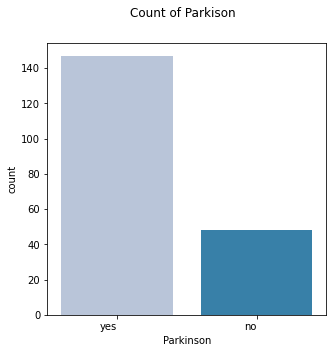

In [7]:
# Count plot showing number of people with parkinson
plt.figure(figsize = (5, 5))
ax = sns.countplot(x=park['Parkinson'], palette = 'PuBu')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, ha = "right")
plt.suptitle("Count of Parkison")
plt.show()



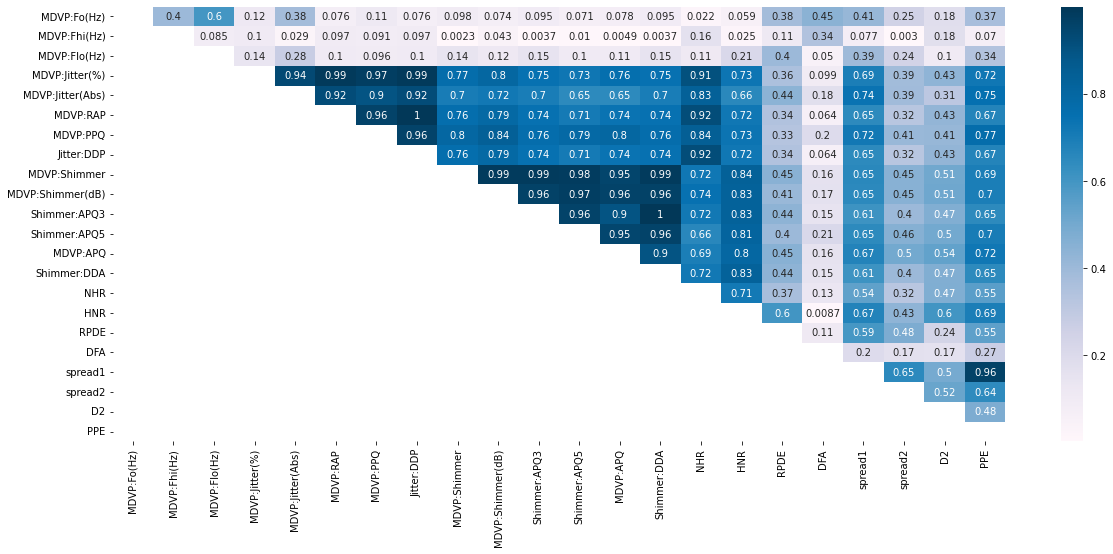

In [8]:
# Correlation matrix to find correlation.
corr_matrix = x.corr().abs()
# Only upper matrix is plotted. Upper half and lower half are same
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
plt.figure(figsize = (20, 8))
sns.heatmap(upper, cmap = 'PuBu', annot = True,)
plt.show()

Some features are highly correalted and can result multicollinearity and eventually in overfitting. These featurees are removed in the next section .i.e feature engineering

## 3. Feature Engineering
This part focuses two parts:1) Feature selection and 2) Feature scaling.
Feature selection involves dimensionality reduction which reduces the number of dimensions(features). I have applied an ensmeble method in this assignment to select most relevant features.
Initially, all correlated features are found using correlation matrix. Second lasso regularization with anova is done to find the feature importance. Finally I used these two methods to drop the least important features.
The threshold for correlation is set as .95.

In [9]:
def corr_drop(upper):
    """Function to implement lasso regularization.
    classifiers: List of classifieers
    Input:
    Upper half of the correlation matrix
    
    Ouputs:
    drop1: List of features which are highly correlated
    """

    # Find index of feature columns with correlation greater than 0.95
    high_corr_var=np.where(upper>0.9)
    # Getting column and row names(features)
    high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y])  for x,y in zip(*high_corr_var) if x!=y and x<y]
    # Unstacking the list of tuples into a single list of column names.
    drop1=list(sum(high_corr_var, ()))
    return drop1

#Getting list of correlated features
drop1=corr_drop(upper)
drop1

['MDVP:Jitter(%)',
 'MDVP:Jitter(Abs)',
 'MDVP:Jitter(%)',
 'MDVP:RAP',
 'MDVP:Jitter(%)',
 'MDVP:PPQ',
 'MDVP:Jitter(%)',
 'Jitter:DDP',
 'MDVP:Jitter(%)',
 'NHR',
 'MDVP:Jitter(Abs)',
 'MDVP:RAP',
 'MDVP:Jitter(Abs)',
 'Jitter:DDP',
 'MDVP:RAP',
 'MDVP:PPQ',
 'MDVP:RAP',
 'Jitter:DDP',
 'MDVP:RAP',
 'NHR',
 'MDVP:PPQ',
 'Jitter:DDP',
 'Jitter:DDP',
 'NHR',
 'MDVP:Shimmer',
 'MDVP:Shimmer(dB)',
 'MDVP:Shimmer',
 'Shimmer:APQ3',
 'MDVP:Shimmer',
 'Shimmer:APQ5',
 'MDVP:Shimmer',
 'MDVP:APQ',
 'MDVP:Shimmer',
 'Shimmer:DDA',
 'MDVP:Shimmer(dB)',
 'Shimmer:APQ3',
 'MDVP:Shimmer(dB)',
 'Shimmer:APQ5',
 'MDVP:Shimmer(dB)',
 'MDVP:APQ',
 'MDVP:Shimmer(dB)',
 'Shimmer:DDA',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'Shimmer:APQ3',
 'Shimmer:DDA',
 'Shimmer:APQ5',
 'MDVP:APQ',
 'Shimmer:APQ5',
 'Shimmer:DDA',
 'spread1',
 'PPE']

The above features are highly correlated. They are repetitions because a high correlation gives a pair of features(one from row and one from the column). 

In [10]:
X = x.values
Y = y.values
feature_names = x.columns


def lasso_regularization(X,Y,feature_names):
    """Function to implement lasso regularization.
    classifiers: List of classifieers
    Inputs:
    X: Array values of input
    Y: Array valeus of output
    feature_names:List of feature names
    
    Ouputs:
    dtf_features: Dataframe which shows the importance of each feature in anaova and lasso method """
    
    ## Anova
    selector = feature_selection.SelectKBest(score_func=  
                   feature_selection.f_classif, k=10).fit(X,Y)
    anova_selected_features = feature_names[selector.get_support()]
    
    ## Lasso regularization
    selector = feature_selection.SelectFromModel(estimator= 
                  linear_model.LogisticRegression(C=1, penalty="l1", 
                  solver='liblinear'), max_features=10).fit(X,Y)
    lasso_selected_features = feature_names[selector.get_support()]
     
    ## Plot
    dtf_features = pd.DataFrame({"features":feature_names})
    dtf_features["anova"] = dtf_features["features"].apply(lambda x: "anova" if x in anova_selected_features else "")
    dtf_features["num1"] = dtf_features["features"].apply(lambda x: 1 if x in anova_selected_features else 0)
    dtf_features["lasso"] = dtf_features["features"].apply(lambda x: "lasso" if x in lasso_selected_features else "")
    dtf_features["num2"] = dtf_features["features"].apply(lambda x: 1 if x in lasso_selected_features else 0)
    dtf_features["method"] = dtf_features[["anova","lasso"]].apply(lambda x: (x[0]+" "+x[1]).strip(), axis=1)
    dtf_features["selection"] = dtf_features["num1"] + dtf_features["num2"]
    return dtf_features

dtf_features=lasso_regularization(X, Y, feature_names)
# 
dtf_features.head()

,features,anova,num1,lasso,num2,method,selection
0,MDVP:Fo(Hz),anova,1,lasso,1,anova lasso,2
1,MDVP:Fhi(Hz),,0,lasso,1,lasso,1
2,MDVP:Flo(Hz),anova,1,lasso,1,anova lasso,2
3,MDVP:Jitter(%),,0,,0,,0
4,MDVP:Jitter(Abs),,0,,0,,0


<AxesSubplot:title={'center':'Feature selection based on Lasso regularization and ANOVA'}, xlabel='selection', ylabel='features'>

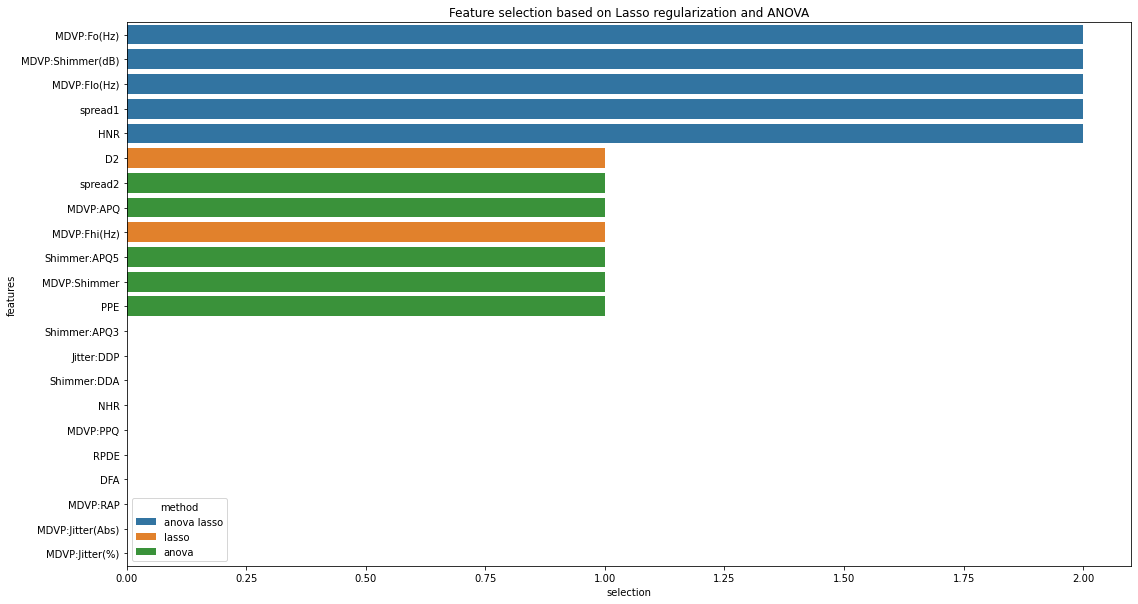

In [11]:
fig=plt.figure(figsize=(18,10))
plt.title("Feature selection based on Lasso regularization and ANOVA")
sns.barplot(y="features", x="selection", hue="method", data=dtf_features.sort_values("selection", ascending=False), dodge=False)

The below cell gives the final list of features to be dropped. This done by selecting the feature names to common to features in drop1 and drop2 list.

In [12]:
# Selecting the least important features from lasso and anova method
drop2=[row['features'] for index,row in dtf_features.iterrows() if all(row[['num1','num2','selection']]==0)]

# The final feature list to drop obtained by finding the common feature names from correlation and anova lasso method
final_drop=set(drop1)& set(drop2)

x=x.drop(columns=final_drop)

After doing the dimensionality reduction, distribution of the features are checked using distplot.Because less important features are already dropped, plotting distribution plots of features are more computionally efficent as there are less number of features

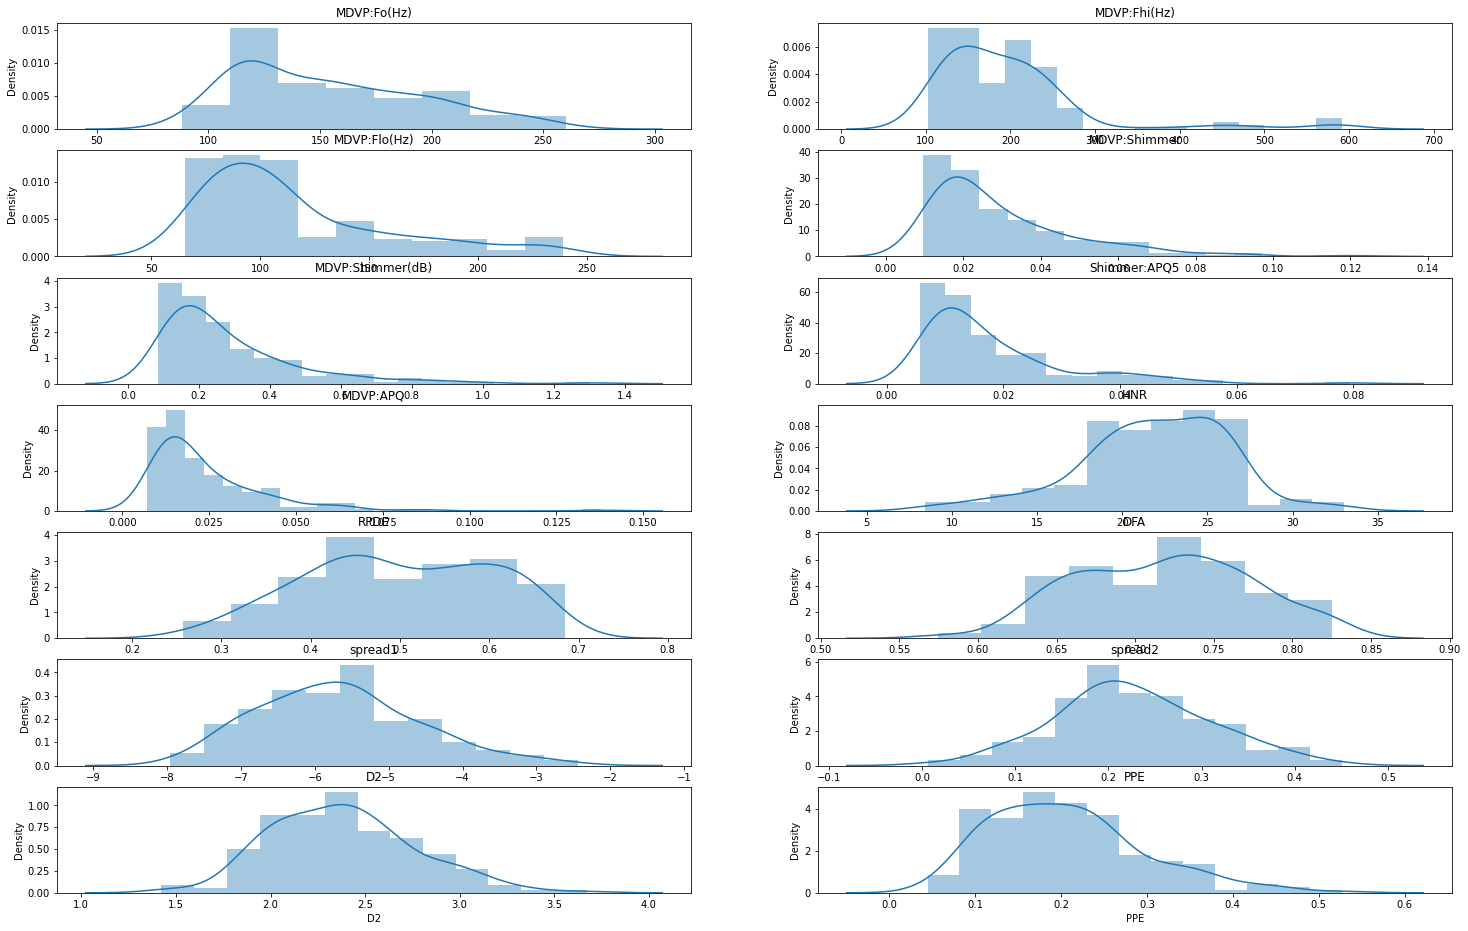

In [13]:
# Plotting distribution plot.
fig=plt.figure(figsize=(25,16))
for i,column in enumerate(x.columns):
  fig.add_subplot(7,2,i+1).set_title(column)
  ax=sns.distplot(x[column])

The pariplot shows that features are skewed and therefore feature scaling is required. The next cell odes the feature scaling of the input features.
Becuase the input data is skewed, Standardization(z score) is applied to remove the skewness. Min max scaling is not chosen because all the input features are in the same domain(features of sound). Standardization(z scores)or box cox transformation are suitable in thiss case. Hence I chose Standardization as feature scaling.

In [14]:
# Calculating z scores
x=(x - x.mean(axis=0))/x.std(axis=0)

## 4.Data preparation
There is data imbalance in data set.i.e the number of people having Parkinson is higher than control group. So I used stratify and shuffle option in train_test_split function of sklearn to reduce imbalance and thereby chances of overfitting.


In [39]:

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33,stratify=y,shuffle=True,)

In [40]:
classifiers=[]
classifiers.append(LogisticRegression(solver='liblinear'))
classifiers.append(SVC(kernel='linear', probability=True))
classifiers.append(GaussianNB())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(CatBoostClassifier())


## 5. Model Building and Evaluation
I used six classifiers in thsi section.They are Logistic Regression, Support Vector Machine, Decison tree, Naive Bayes and finally two ensemble algorithms namesly Random forest and Catboost.
Random forest is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. This algorithnm works for small data set
CatBoost is an algorithm for gradient boosting on decision trees. Its a newly developed alogorthm which works non-homogenous dataset and small data sets







Confusion matrix accuracy= (TP+TN)/(Total samples)
AUC curve=The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.
The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes. Higher the area under the curve , better the model.


In [41]:
models=['Logistic Regression','SVM','Naive Bayes','Decision Tree','Random Forest','CatBoost']
acc_list=[]
auc_list=[]
cm_list=[]

model_fits=[]
def eval_metrics(classifiers):
    """Function to calculate evaluation metrics such as Accuarcy,AUC and Confusion Matrix
    Inputs:
    classifiers: List of classifieers
    Ouputs:
    model_fits: Objects of all models build using fit functionof sklearn
    acc_list: List of accuracy of models
    auc_list:List of AUC of models
    cm_list:List of confusion matrix of models"""
    
    for model in classifiers:
      #Fits the modle to the training data
      model_fits.append(model.fit(X_train,y_train))
      #Predicts the output based on test data
      y_pred=model.predict(X_test)
      # Finding accuracy of the prediction
      acc_list.append(metrics.accuracy_score(y_test,y_pred))
      # Finding flase and true positive rates
      fpr,tpr,_thresholds=metrics.roc_curve(y_test,y_pred,pos_label=model.classes_[1])
      # Finding Area under curve using fpr, and tpr
      auc_list.append(round(metrics.auc(fpr,tpr),2))
      # Finding confusion matrix values
      cm_list.append(confusion_matrix(y_test,y_pred))
      
    return model_fits, acc_list,auc_list,cm_list,

model_fits,acc_list,auc_list,cm_list=eval_metrics(classifiers)
  

Learning rate set to 0.004311
0:	learn: 0.6887372	total: 3.66ms	remaining: 3.65s
1:	learn: 0.6855132	total: 7.04ms	remaining: 3.51s
2:	learn: 0.6809603	total: 10.4ms	remaining: 3.46s
3:	learn: 0.6767438	total: 13.9ms	remaining: 3.46s
4:	learn: 0.6722062	total: 17.2ms	remaining: 3.42s
5:	learn: 0.6682062	total: 20.6ms	remaining: 3.4s
6:	learn: 0.6637478	total: 24ms	remaining: 3.4s
7:	learn: 0.6594109	total: 27.3ms	remaining: 3.39s
8:	learn: 0.6545465	total: 30.6ms	remaining: 3.37s
9:	learn: 0.6497428	total: 34.2ms	remaining: 3.39s
10:	learn: 0.6456740	total: 37.6ms	remaining: 3.38s
11:	learn: 0.6419618	total: 42.1ms	remaining: 3.47s
12:	learn: 0.6379889	total: 45.7ms	remaining: 3.47s
13:	learn: 0.6336737	total: 49.2ms	remaining: 3.46s
14:	learn: 0.6298016	total: 52.3ms	remaining: 3.43s
15:	learn: 0.6259176	total: 55.3ms	remaining: 3.4s
16:	learn: 0.6211774	total: 58.2ms	remaining: 3.36s
17:	learn: 0.6179826	total: 61ms	remaining: 3.33s
18:	learn: 0.6137023	total: 63.8ms	remaining: 3.29s

167:	learn: 0.2831816	total: 511ms	remaining: 2.53s
168:	learn: 0.2819262	total: 514ms	remaining: 2.53s
169:	learn: 0.2805515	total: 517ms	remaining: 2.52s
170:	learn: 0.2793491	total: 521ms	remaining: 2.52s
171:	learn: 0.2782470	total: 524ms	remaining: 2.52s
172:	learn: 0.2769502	total: 528ms	remaining: 2.52s
173:	learn: 0.2755025	total: 531ms	remaining: 2.52s
174:	learn: 0.2744471	total: 534ms	remaining: 2.52s
175:	learn: 0.2732417	total: 538ms	remaining: 2.52s
176:	learn: 0.2720442	total: 541ms	remaining: 2.52s
177:	learn: 0.2705512	total: 545ms	remaining: 2.52s
178:	learn: 0.2693041	total: 548ms	remaining: 2.51s
179:	learn: 0.2679767	total: 551ms	remaining: 2.51s
180:	learn: 0.2669066	total: 554ms	remaining: 2.5s
181:	learn: 0.2655841	total: 556ms	remaining: 2.5s
182:	learn: 0.2647154	total: 560ms	remaining: 2.5s
183:	learn: 0.2638092	total: 562ms	remaining: 2.49s
184:	learn: 0.2626685	total: 565ms	remaining: 2.49s
185:	learn: 0.2616278	total: 568ms	remaining: 2.49s
186:	learn: 0.2

338:	learn: 0.1507256	total: 1.03s	remaining: 2.02s
339:	learn: 0.1501541	total: 1.04s	remaining: 2.02s
340:	learn: 0.1495879	total: 1.04s	remaining: 2.01s
341:	learn: 0.1490937	total: 1.04s	remaining: 2.01s
342:	learn: 0.1485746	total: 1.05s	remaining: 2.01s
343:	learn: 0.1480174	total: 1.05s	remaining: 2.01s
344:	learn: 0.1474487	total: 1.06s	remaining: 2s
345:	learn: 0.1470677	total: 1.06s	remaining: 2s
346:	learn: 0.1467437	total: 1.06s	remaining: 2s
347:	learn: 0.1463198	total: 1.06s	remaining: 2s
348:	learn: 0.1458205	total: 1.07s	remaining: 1.99s
349:	learn: 0.1454215	total: 1.07s	remaining: 1.99s
350:	learn: 0.1448441	total: 1.07s	remaining: 1.99s
351:	learn: 0.1444591	total: 1.08s	remaining: 1.98s
352:	learn: 0.1439944	total: 1.08s	remaining: 1.98s
353:	learn: 0.1435752	total: 1.08s	remaining: 1.98s
354:	learn: 0.1431363	total: 1.09s	remaining: 1.97s
355:	learn: 0.1425869	total: 1.09s	remaining: 1.97s
356:	learn: 0.1422664	total: 1.09s	remaining: 1.97s
357:	learn: 0.1418869	to

512:	learn: 0.0955179	total: 1.55s	remaining: 1.47s
513:	learn: 0.0952709	total: 1.56s	remaining: 1.47s
514:	learn: 0.0950656	total: 1.56s	remaining: 1.47s
515:	learn: 0.0948877	total: 1.56s	remaining: 1.47s
516:	learn: 0.0946790	total: 1.57s	remaining: 1.46s
517:	learn: 0.0944422	total: 1.57s	remaining: 1.46s
518:	learn: 0.0941734	total: 1.57s	remaining: 1.46s
519:	learn: 0.0939762	total: 1.58s	remaining: 1.46s
520:	learn: 0.0937022	total: 1.58s	remaining: 1.45s
521:	learn: 0.0934806	total: 1.58s	remaining: 1.45s
522:	learn: 0.0932964	total: 1.59s	remaining: 1.45s
523:	learn: 0.0930304	total: 1.59s	remaining: 1.44s
524:	learn: 0.0928511	total: 1.59s	remaining: 1.44s
525:	learn: 0.0925974	total: 1.59s	remaining: 1.44s
526:	learn: 0.0924660	total: 1.6s	remaining: 1.43s
527:	learn: 0.0922298	total: 1.6s	remaining: 1.43s
528:	learn: 0.0919572	total: 1.6s	remaining: 1.43s
529:	learn: 0.0917183	total: 1.61s	remaining: 1.42s
530:	learn: 0.0915699	total: 1.61s	remaining: 1.42s
531:	learn: 0.0

684:	learn: 0.0657684	total: 2.07s	remaining: 953ms
685:	learn: 0.0656513	total: 2.08s	remaining: 950ms
686:	learn: 0.0655254	total: 2.08s	remaining: 947ms
687:	learn: 0.0653784	total: 2.08s	remaining: 944ms
688:	learn: 0.0652940	total: 2.08s	remaining: 941ms
689:	learn: 0.0651262	total: 2.09s	remaining: 938ms
690:	learn: 0.0650235	total: 2.09s	remaining: 936ms
691:	learn: 0.0648791	total: 2.1s	remaining: 933ms
692:	learn: 0.0647534	total: 2.1s	remaining: 930ms
693:	learn: 0.0646907	total: 2.1s	remaining: 927ms
694:	learn: 0.0645677	total: 2.1s	remaining: 923ms
695:	learn: 0.0643875	total: 2.11s	remaining: 920ms
696:	learn: 0.0642692	total: 2.11s	remaining: 917ms
697:	learn: 0.0641415	total: 2.11s	remaining: 914ms
698:	learn: 0.0640184	total: 2.12s	remaining: 911ms
699:	learn: 0.0638852	total: 2.12s	remaining: 908ms
700:	learn: 0.0637888	total: 2.12s	remaining: 905ms
701:	learn: 0.0636414	total: 2.13s	remaining: 902ms
702:	learn: 0.0635418	total: 2.13s	remaining: 899ms
703:	learn: 0.06

852:	learn: 0.0487662	total: 2.57s	remaining: 443ms
853:	learn: 0.0486721	total: 2.57s	remaining: 440ms
854:	learn: 0.0486067	total: 2.58s	remaining: 437ms
855:	learn: 0.0485147	total: 2.58s	remaining: 434ms
856:	learn: 0.0484479	total: 2.58s	remaining: 431ms
857:	learn: 0.0483819	total: 2.59s	remaining: 428ms
858:	learn: 0.0482869	total: 2.59s	remaining: 425ms
859:	learn: 0.0481803	total: 2.59s	remaining: 422ms
860:	learn: 0.0481157	total: 2.6s	remaining: 419ms
861:	learn: 0.0480019	total: 2.6s	remaining: 416ms
862:	learn: 0.0479333	total: 2.6s	remaining: 413ms
863:	learn: 0.0478632	total: 2.61s	remaining: 410ms
864:	learn: 0.0477708	total: 2.61s	remaining: 407ms
865:	learn: 0.0477052	total: 2.61s	remaining: 404ms
866:	learn: 0.0476330	total: 2.61s	remaining: 401ms
867:	learn: 0.0475676	total: 2.62s	remaining: 398ms
868:	learn: 0.0474681	total: 2.62s	remaining: 395ms
869:	learn: 0.0473777	total: 2.62s	remaining: 392ms
870:	learn: 0.0472855	total: 2.63s	remaining: 389ms
871:	learn: 0.0

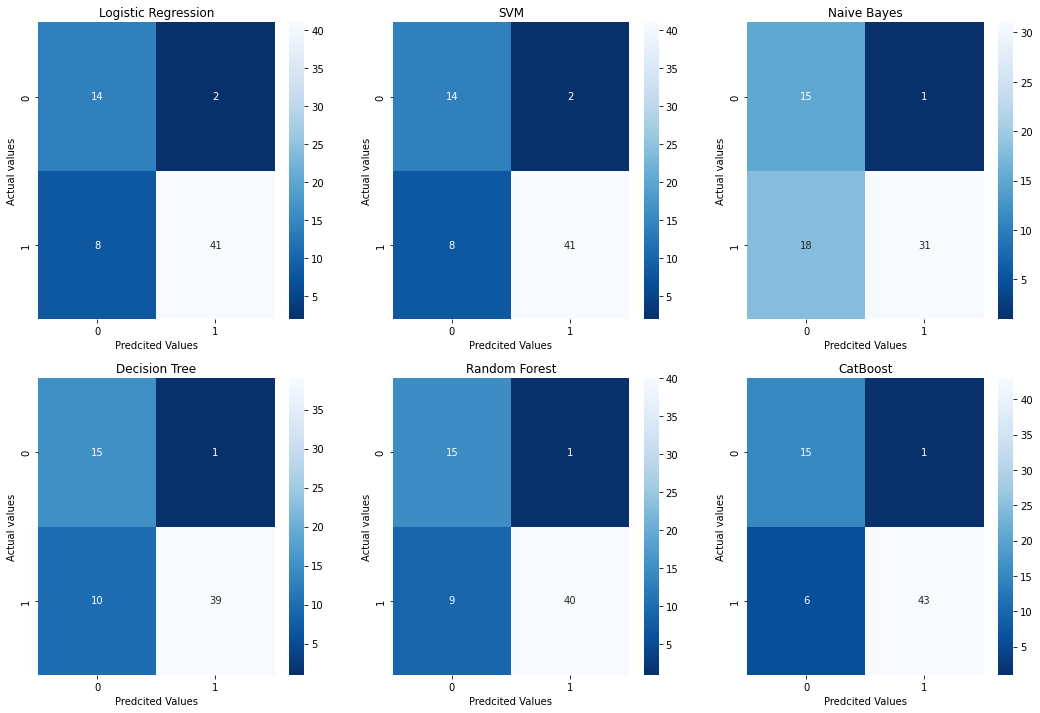

In [42]:
def conf_mat(cm_list):
    """Function to plot confusion matrix of all classifiers.
    Inputs:
    classifiers: cm_list obtained from the above function eval_metrics
    Ouputs:
    Figure showing confusion matrix of all classifiers.
    """
    fig=plt.figure(figsize=(18,12))
    for i in range(len(cm_list)):
      cm=cm_list[i]
      model=models[i]
      fig.add_subplot(2,3,i+1).set_title(model)
      cm_plot=sns.heatmap(cm,annot=True,cmap='Blues_r')
      cm_plot.set_xlabel('Predcited Values')
      cm_plot.set_ylabel('Actual values')
    return


conf_mat(cm_list)
  

Higher the values of true positve rate and false positive rate(left diagonal values) higher will be the accuarcy of the model, hence better the model is.

In [43]:
# Results_df is the final datafarme which contains model names along with accuarcy and AUC
results_df=pd.DataFrame({'Model':models,'Accuracy':acc_list,'AUC':auc_list})
results_df

,Model,Accuracy,AUC
0,Logistic Regression,0.846154,0.86
1,SVM,0.846154,0.86
2,Naive Bayes,0.707692,0.79
3,Decision Tree,0.830769,0.87
4,Random Forest,0.846154,0.88
5,CatBoost,0.892308,0.91


In [44]:
def finaldf_plot(models,acc_list,auc_list):
    """Function to rearrange the results_df .
    Inputs:
    classifiers: cm_list obtained from the above function eval_metrics
    Ouputs:
    Figure showing confusion matrix of all classifiers.
    """
    df1=pd.DataFrame({'Model':models,'Accuracy':acc_list,'Metric':np.zeros(len(acc_list))})
    df2=pd.DataFrame({'Model':models,'AUC':auc_list,'Metric':np.ones(len(acc_list))})
    f_df=pd.concat([df1,df2])
    f_df['Metric']=f_df['Metric'].map({0:'Accuracy',1:'AUC',})
    return f_df
f_df=finaldf_plot(models,acc_list,auc_list)

#Plot showing the models and their corresponding Accuracy and AUC in descending order.
fig = px.bar(f_df, x="Model", y=["Accuracy",'AUC'], 
                   color="Metric", barmode="group",title="Bar graph showing the accuracy and AUC of the models in ascending order")
fig.update_layout(barmode='group', xaxis={'categoryorder':'total descending'})

fig.show()

    

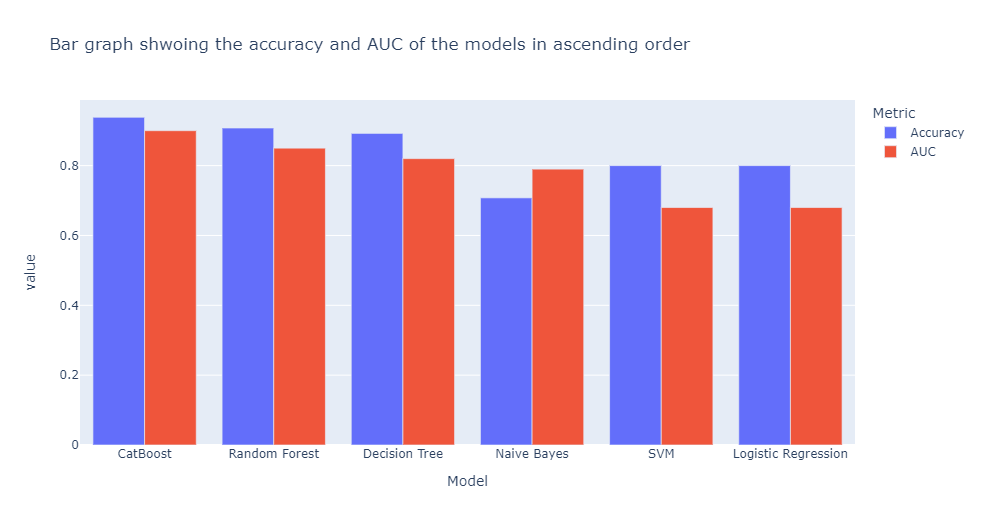

# Results
Ensemble methods such as Catboost and Random forest show highest accuracy and AUC as expected.They work good on small data sets and accurate. Naive Bayes has lower accuarcy becuase it works good for larger datasets.

## 6.Hypertuning and SHAPley values
Hypertuning is done on the best model.i.e CatBoost. The current AUC for CatBoost .89 .

In [45]:


params = {'iterations':5000,
        'learning_rate':0.01,
        'depth':3,
        'eval_metric':'AUC',
        'verbose':200,
        'od_type':"Iter", # overfit detector
        'od_wait':500, # most recent best iteration to wait before stopping
        'random_seed': 1
          }

cat_model = CatBoostClassifier(**params)
cat_model.fit(X_train, y_train,   
          eval_set=(X_test, y_test), 
          use_best_model=True, # True if we don't want to save trees created after iteration with the best validation score
          plot=True  
         );                                                    




MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.8641582	best: 0.8641582 (0)	total: 1.46ms	remaining: 7.31s
200:	test: 0.9528061	best: 0.9540816 (198)	total: 237ms	remaining: 5.65s
400:	test: 0.9706633	best: 0.9719388 (396)	total: 457ms	remaining: 5.24s
600:	test: 0.9693878	best: 0.9732143 (411)	total: 687ms	remaining: 5.03s
800:	test: 0.9655612	best: 0.9732143 (411)	total: 958ms	remaining: 5.02s
Stopped by overfitting detector  (500 iterations wait)

bestTest = 0.9732142857
bestIteration = 411

Shrink model to first 412 iterations.


Hypertuning gives the AUC to .97 which is better comapred without hypertuning.

In [123]:
from catboost import CatBoostClassifier, Pool
#shap_values = cat_model.get_feature_importance(Pool(X_test, label=y_test,) ,
                                               #type="ShapValues")
shap_values=cat_model.get_feature_importance(Pool(X_train, label=y_train,) ,
                                               type="ShapValues")
expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]



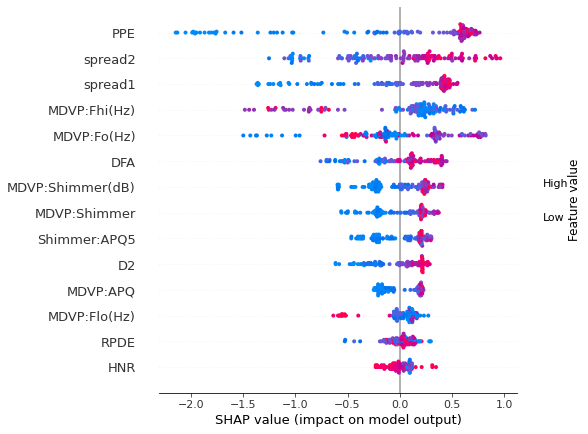

In [124]:
shap.initjs()
shap.force_plot(expected_value, shap_values[0,:], X_test.iloc[0,:])
shap.summary_plot(shap_values, X_train)

Each point on the summary plot is a Shapley value for a feature and an instance. The position on the y-axis is determined by the feature and on the x-axis by the Shapley value. The color represents the value of the feature from low(blue) to high(red). 

This plot is made of all the dots in the train data. It demonstrates the following information:

Feature importance: Variables are ranked in descending order.
Impact: The horizontal location shows whether the effect of that value is associated with a higher or lower prediction.
Original value: Color shows whether that variable is high (in red) or low (in blue) for that observation.
Correlation: A high value of PPE will have high value on output .i.e person to be classified as Parkinson.

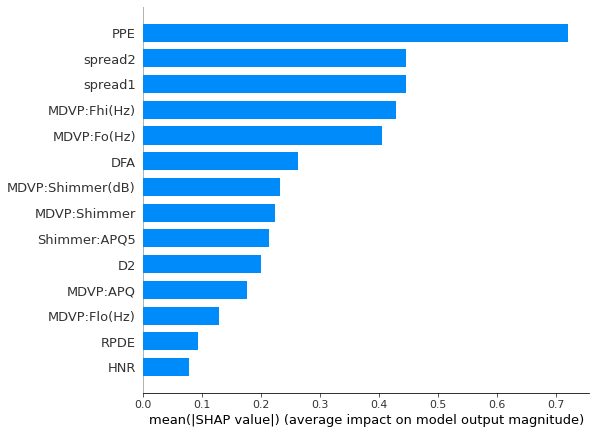

In [125]:

shap.summary_plot(shap_values, X_train, plot_type="bar")

The above plot shows the SHAP feature importance measured as the mean absolute Shapley values.

SHAP is based on magnitude of feature attributions. PPE,spread2 and spread1 are the features which contribute to a subject to be classified as Parkinson

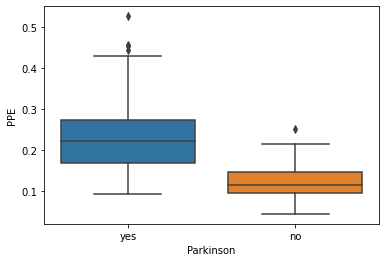

In [126]:

ax = sns.boxplot(x="Parkinson", y="PPE", data=park)

As concluded from the SHAPley plot, subjects with Parkison disease have higher PPE(a feature of vocal sound) than control group.

# 7 Conclusion:
The assignment build six supervised classification models to predict whether a person has Parkinson disease or not. Newly developed algorithm named CatBoost Classifier showed higherst accuracy and AUC comapred with other models.After hypertuning Catboost classifier increased its AUC to .97.

# Discussion:
Votingclassifier and other ensembling methods are not performed because CatBoost classifier after hyperparameter tuning gave a good AUC of .97.